# Context:

India is the second largest market globally for smartphones after China. About 134 million smartphones were sold across India in the year 2017 and is estimated to increase to about 442 million in 2022. India ranked second in the average time spent on mobile web by smartphone  users  across  Asia  Pacific.  The  combination  of  very  high  sales  volumes  and  the  average  smartphone  consumer  behaviour  has made India a very attractive market for foreign vendors. As per Consumer behaviour, 97% of consumers turn to a search engine when they are buying a product vs. 15% who turn to social media. If a seller succeeds to publish smartphones based on user’s behaviour/choice at the right  place,  there  are  90%  chances  that  user  will  enquire  for  the  same.  This  Case  Study  is  targeted  to  build  a  recommendation  system based on individual consumer’s behaviour or choice.

In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
from sklearn.impute import KNNImputer
from collections import defaultdict
from surprise import SVD,KNNWithMeans
#from sklearn.externals import joblib
import scipy.sparse
from scipy.sparse import csr_matrix
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# Read and explore the dataset


In [21]:
df1= pd.read_csv(r"phone_user_review_file_1.csv",encoding='latin1')
df2= pd.read_csv("phone_user_review_file_2.csv",encoding='latin1')
df3= pd.read_csv("phone_user_review_file_3.csv",encoding='latin1')
df4= pd.read_csv("phone_user_review_file_4.csv",encoding='latin1')
df5= pd.read_csv("phone_user_review_file_5.csv",encoding='latin1')
df6= pd.read_csv("phone_user_review_file_6.csv",encoding='latin1')

In [22]:
df1.head(10)

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Verizon Wireless,verizonwireless.com,10.0,10.0,As a diehard Samsung fan who has had every Sam...,CarolAnn35,Samsung Galaxy S8
1,/cellphones/samsung-galaxy-s8/,4/28/2017,en,us,Phone Arena,phonearena.com,10.0,10.0,Love the phone. the phone is sleek and smooth ...,james0923,Samsung Galaxy S8
2,/cellphones/samsung-galaxy-s8/,5/4/2017,en,us,Amazon,amazon.com,6.0,10.0,Adequate feel. Nice heft. Processor's still sl...,R. Craig,"Samsung Galaxy S8 (64GB) G950U 5.8"" 4G LTE Unl..."
3,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Samsung,samsung.com,9.2,10.0,Never disappointed. One of the reasons I've be...,Buster2020,Samsung Galaxy S8 64GB (AT&T)
4,/cellphones/samsung-galaxy-s8/,5/11/2017,en,us,Verizon Wireless,verizonwireless.com,4.0,10.0,I've now found that i'm in a group of people t...,S Ate Mine,Samsung Galaxy S8
5,/cellphones/samsung-galaxy-s8/,5/10/2017,en,us,Verizon Wireless,verizonwireless.com,10.0,10.0,I am the type of person who never would comple...,BDB76,Samsung Galaxy S8
6,/cellphones/samsung-galaxy-s8/,5/10/2017,en,us,Verizon Wireless,verizonwireless.com,4.0,10.0,The way this Samsung S8 phone operates is more...,KLC30306,Samsung Galaxy S8
7,/cellphones/samsung-galaxy-s8/,5/10/2017,en,us,Verizon Wireless,verizonwireless.com,6.0,10.0,I bought this phone very excited to use it. I ...,Mnhy,Samsung Galaxy S8
8,/cellphones/samsung-galaxy-s8/,5/10/2017,en,us,Verizon Wireless,verizonwireless.com,6.0,10.0,It is an extremely advanced and truly a Smart ...,Mr Alan,Samsung Galaxy S8
9,/cellphones/samsung-galaxy-s8/,5/10/2017,en,us,Verizon Wireless,verizonwireless.com,8.0,10.0,"Great phone with a PHENOMENAL Camera, not all ...",Raven Wolf Song,Samsung Galaxy S8


In [23]:
df1.shape

(374910, 11)

In [24]:
df2.head(10)

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/leagoo-lead-7/,4/15/2015,en,us,Amazon,amazon.com,2.0,10.0,"The telephone headset is of poor quality , not...",luis,Leagoo Lead7 5.0 Inch HD JDI LTPS Screen 3G Sm...
1,/cellphones/leagoo-lead-7/,5/23/2015,en,gb,Amazon,amazon.co.uk,10.0,10.0,This is my first smartphone so I have nothing ...,Mark Lavin,Leagoo Lead 7 Lead7 MTK6582 Quad core 1GB RAM ...
2,/cellphones/leagoo-lead-7/,4/27/2015,en,gb,Amazon,amazon.co.uk,8.0,10.0,Great phone. Battery life not great but seems ...,tracey,Leagoo Lead 7 Lead7 MTK6582 Quad core 1GB RAM ...
3,/cellphones/leagoo-lead-7/,4/22/2015,en,gb,Amazon,amazon.co.uk,10.0,10.0,Best 90 quid I've ever spent on a smart phone,Reuben Ingram,Leagoo Lead 7 Lead7 MTK6582 Quad core 1GB RAM ...
4,/cellphones/leagoo-lead-7/,4/18/2015,en,gb,Amazon,amazon.co.uk,10.0,10.0,I m happy with this phone.it s very good.thx team,viorel,Leagoo Lead 7 Lead7 MTK6582 Quad core 1GB RAM ...
5,/cellphones/leagoo-lead-7/,4/14/2015,en,us,Amazon,amazon.com,10.0,10.0,Exelent phone. Evriting perfect. Service is am...,Milena,Leagoo Lead7 5.0 Inch HD JDI LTPS Screen 3G Sm...
6,/cellphones/leagoo-lead-7/,4/1/2015,en,gb,Amazon,amazon.co.uk,10.0,10.0,"Great mobile, but contains malware, in the for...",lee carroll,Leagoo Lead 7 Lead7 MTK6582 Quad core 1GB RAM ...
7,/cellphones/leagoo-lead-7/,11/6/2015,it,it,Amazon,amazon.it,10.0,10.0,"maneggevole, pratico, veloce, ottime foto........",Filippo L.,"LEAGOO Lead 7 MTK6582 Quad Core 5"" Pollice Sma..."
8,/cellphones/leagoo-lead-7/,10/26/2015,it,it,Amazon,amazon.it,10.0,10.0,"Prodotto ECCELLENTE!!! Praticamente perfetto, ...",Emiliano S.,"LEAGOO Lead 7 MTK6582 Quad Core 5"" Pollice Sma..."
9,/cellphones/leagoo-lead-7/,9/19/2015,it,it,Amazon,amazon.it,10.0,10.0,Cercavo un telefono che avesse una fotocamera ...,rossano,"LEAGOO Lead 7 MTK6582 Quad Core 5"" Pollice Sma..."


In [25]:
df2.shape

(114925, 11)

In [26]:
df3.head(10)

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/samsung-galaxy-s-iii-slim-sm-g3812/,11/7/2015,pt,br,Submarino,submarino.com.br,6.0,10.0,"recomendo, eu comprei um, a um ano, e agora co...",herlington tesch,Samsung Smartphone Samsung Galaxy S3 Slim G381...
1,/cellphones/samsung-galaxy-s-iii-slim-sm-g3812/,10/2/2015,pt,br,Submarino,submarino.com.br,10.0,10.0,Comprei um pouco desconfiada do site e do celu...,Luisa Silva Marieta,Samsung Smartphone Samsung Galaxy S3 Slim G381...
2,/cellphones/samsung-galaxy-s-iii-slim-sm-g3812/,9/2/2015,pt,br,Submarino,submarino.com.br,10.0,10.0,"Muito bom o produto, obvio que tem versÃµes me...",Cyrus,Samsung Smartphone Samsung Galaxy S3 Slim G381...
3,/cellphones/samsung-galaxy-s-iii-slim-sm-g3812/,9/2/2015,pt,br,Submarino,submarino.com.br,8.0,10.0,Unica ressalva fica para a camera que poderia ...,Marcela Santa Clara Brito,Samsung Smartphone Samsung Galaxy S3 Slim G381...
4,/cellphones/samsung-galaxy-s-iii-slim-sm-g3812/,9/1/2015,pt,br,Colombo,colombo.com.br,8.0,10.0,Rapidez e atenÃ§Ã£o na entrega. O aparelho Ã© ...,Claudine Maria Kuhn Walendorff,"Smartphone Samsung Galaxy S3 Slim, Dual Chip, ..."
5,/cellphones/samsung-galaxy-s-iii-slim-sm-g3812/,9/1/2015,pt,br,Submarino,submarino.com.br,8.0,10.0,Gostei do produto e entrega ocorreu antes do p...,JCVS,Samsung Smartphone Samsung Galaxy S3 Slim G381...
6,/cellphones/samsung-galaxy-s-iii-slim-sm-g3812/,8/3/2015,pt,br,Submarino,submarino.com.br,10.0,10.0,"Ã³timo aparelho, unica coisa ruim Ã© a camera ...",Juliana Viana,Samsung Smartphone Samsung Galaxy S3 Slim G381...
7,/cellphones/samsung-galaxy-s-iii-slim-sm-g3812/,7/29/2015,pt,br,Submarino,submarino.com.br,4.0,10.0,Aparelho muito simples pelo preÃ§o que se paga...,Julio cabal,Samsung Smartphone Samsung Galaxy S3 Slim G381...
8,/cellphones/samsung-galaxy-s-iii-slim-sm-g3812/,7/24/2015,pt,br,Submarino,submarino.com.br,10.0,10.0,"excelente produto gostei muito, estou satifeit...",RIVALDO CIOQUETA JUNIOR,Samsung Smartphone Samsung Galaxy S3 Slim G381...
9,/cellphones/samsung-galaxy-s-iii-slim-sm-g3812/,7/21/2015,pt,br,Submarino,submarino.com.br,10.0,10.0,"Ã um excelente aparelho,leve prÃ¡tico ....cÃ¢...",Dulcili,Samsung Smartphone Samsung Galaxy S3 Slim G381...


In [27]:
df3.shape

(312961, 11)

In [28]:
df4.head(10)

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/samsung-s7262-duos-galaxy-ace/,3/11/2015,en,us,Amazon,amazon.com,2.0,10.0,was not conpatable with my phone as stated. I ...,Frances DeSimone,Samsung Galaxy Star Pro DUOS S7262 Unlocked Ce...
1,/cellphones/samsung-s7262-duos-galaxy-ace/,17/11/2015,en,in,Zopper,zopper.com,10.0,10.0,Decent Functions and Easy to Operate Pros:- Th...,Expert Review,Samsung Galaxy Star Pro S7262 Black
2,/cellphones/samsung-s7262-duos-galaxy-ace/,29/10/2015,en,in,Amazon,amazon.in,4.0,10.0,Not Good Phone such price. Hang too much and v...,Amazon Customer,Samsung Galaxy Star Pro GT-S7262 (Midnight Black)
3,/cellphones/samsung-s7262-duos-galaxy-ace/,29/10/2015,en,in,Amazon,amazon.in,6.0,10.0,not bad for features,Amazon Customer,Samsung Galaxy Star Pro GT-S7262 (Midnight Black)
4,/cellphones/samsung-s7262-duos-galaxy-ace/,29/10/2015,en,in,Amazon,amazon.in,10.0,10.0,Excellent product,NHK,Samsung Galaxy Star Pro GT-S7262 (Midnight Black)
5,/cellphones/samsung-s7262-duos-galaxy-ace/,27/10/2015,en,in,Amazon,amazon.in,8.0,10.0,Good in reasonable price,Rupali,Samsung Galaxy Star Pro GT-S7262 (Midnight Black)
6,/cellphones/samsung-s7262-duos-galaxy-ace/,27/10/2015,en,us,Amazon,amazon.com,2.0,10.0,I hate it no flash no front camera microphone ...,Ashney,Samsung Galaxy Star Pro DUOS S7262 Unlocked Ce...
7,/cellphones/samsung-s7262-duos-galaxy-ace/,26/10/2015,en,in,Amazon,amazon.in,2.0,10.0,The phone is getting struck very frequently.. ...,Amazon Customer,Samsung Galaxy Star Pro GT-S7262 (Midnight Black)
8,/cellphones/samsung-s7262-duos-galaxy-ace/,25/10/2015,en,in,Amazon,amazon.in,6.0,10.0,Original product received with complete packag...,Amazon Customer,Samsung Galaxy Star Pro GT-S7262 (Midnight Black)
9,/cellphones/samsung-s7262-duos-galaxy-ace/,21/10/2015,en,in,Amazon,amazon.in,10.0,10.0,Good product from Samsung. Just right for ever...,Amazon Customer,Samsung Galaxy Star Pro GT-S7262 (Midnight Black)


In [29]:
df4.shape

(98284, 11)

In [30]:
df5.head(10)

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/karbonn-k1616/,7/13/2016,en,in,91 Mobiles,91mobiles.com,2.0,10.0,I bought 1 month before. currently speaker is ...,venkatesh,Karbonn K1616
1,/cellphones/karbonn-k1616/,7/13/2016,en,in,91 Mobiles,91mobiles.com,6.0,10.0,"I just bought one week back, I have Airtel con...",Venkat,Karbonn K1616
2,/cellphones/karbonn-k1616/,7/13/2016,en,in,91 Mobiles,91mobiles.com,4.0,10.0,one problem in this handset opera is not worki...,krrish,Karbonn K1616
3,/cellphones/karbonn-k1616/,4/25/2014,en,in,Naaptol,naaptol.com,10.0,10.0,here Karbonn comes up with an another excellen...,BRIJESH CHAUHAN,Karbonn K1616 - Black
4,/cellphones/karbonn-k1616/,4/23/2013,en,in,Naaptol,naaptol.com,10.0,10.0,"What a phone, all so on Naaptol my god 23% off...",Suraj CHAUHAN,Karbonn K1616 - Black
5,/cellphones/karbonn-k1616/,2/24/2013,en,in,Naaptol,naaptol.com,8.0,10.0,here Karbonn comes up with an another excellen...,Prasoon Gupta,Karbonn K1616 - Black
6,/cellphones/karbonn-k1616/,2/23/2013,en,in,Naaptol,naaptol.com,10.0,10.0,the camera quality is good compared even with ...,Yogeet Patnayak,Karbonn K1616 - Black
7,/cellphones/karbonn-k1616/,2/7/2013,en,in,Naaptol,naaptol.com,8.0,10.0,this mobile having basic features with compare...,Murali Avula,Karbonn K1616 - Black
8,/cellphones/karbonn-k1616/,1/12/2013,en,in,Naaptol,naaptol.com,8.0,10.0,Karbonn mobiles are well known for there quali...,Jeseel Cholassery,Karbonn K1616 - Black
9,/cellphones/karbonn-k1616/,10/13/2012,en,in,Naaptol,naaptol.com,8.0,10.0,"The phone is handy, good build quality, howeve...",Sobhit tiwari,Karbonn K1616 - Black


In [31]:
df5.shape

(350216, 11)

In [32]:
df6.head(10)

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/samsung-instinct-sph-m800/,9/16/2011,en,us,Phone Arena,phonearena.com,8.0,10.0,I've had the phone for awhile and it's a prett...,ajabrams95,Samsung Instinct HD
1,/cellphones/samsung-instinct-sph-m800/,2/13/2014,en,us,Amazon,amazon.com,6.0,10.0,to be clear it is not the sellers fault that t...,Stephanie,Samsung SPH M800 Instinct
2,/cellphones/samsung-instinct-sph-m800/,12/30/2011,en,us,Phone Scoop,phonescoop.com,9.0,10.0,Well i love this phone. i have had ton of phon...,snickers,Instinct M800
3,/cellphones/samsung-instinct-sph-m800/,10/18/2008,en,us,HandCellPhone,handcellphone.com,4.0,10.0,I have had my Instinct for several months now ...,A4C,Samsung Instinct
4,/cellphones/samsung-instinct-sph-m800/,9/6/2008,en,us,Reviewed.com,reviewed.com,6.0,10.0,i have had this instinct phone for about two m...,betaBgood,Samsung Instinct
5,/cellphones/samsung-instinct-sph-m800/,1/28/2009,en,us,ReviewStream,reviewstream.com,NaN,NaN,When I heard that my friend had gotten the new...,rich,Samsung Instinct Phone
6,/cellphones/samsung-instinct-sph-m800/,7/25/2008,en,us,Personal Electronics buzz,pebuzz.com,NaN,NaN,This is a great multi-media phone. The screen ...,Highlight,Samsung Instinct
7,/cellphones/samsung-instinct-sph-m800/,5/12/2015,en,us,Amazon,amazon.com,4.0,10.0,For the price I expected the phone not to be s...,jessica,Samsung SPH M800 Instinct
8,/cellphones/samsung-instinct-sph-m800/,4/26/2015,en,us,Amazon,amazon.com,6.0,10.0,Good for a temporary phone for a preteen.,Amazon Customer,Samsung SPH M800 Instinct
9,/cellphones/samsung-instinct-sph-m800/,9/11/2014,en,us,Amazon,amazon.com,4.0,10.0,Didn't work. Helpful in getting a refund.,Tamarra Kemsley,Samsung SPH M800 Instinct


In [33]:
df6.shape

(163837, 11)

In [34]:
#Concatenating dataframes without duplicates
data=pd.concat([df1,df2,df3,df4,df5,df6]).drop_duplicates()

In [35]:
data.shape

(1408721, 11)

In [36]:
data.head(50)

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Verizon Wireless,verizonwireless.com,10.0,10.0,As a diehard Samsung fan who has had every Sam...,CarolAnn35,Samsung Galaxy S8
1,/cellphones/samsung-galaxy-s8/,4/28/2017,en,us,Phone Arena,phonearena.com,10.0,10.0,Love the phone. the phone is sleek and smooth ...,james0923,Samsung Galaxy S8
2,/cellphones/samsung-galaxy-s8/,5/4/2017,en,us,Amazon,amazon.com,6.0,10.0,Adequate feel. Nice heft. Processor's still sl...,R. Craig,"Samsung Galaxy S8 (64GB) G950U 5.8"" 4G LTE Unl..."
3,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Samsung,samsung.com,9.2,10.0,Never disappointed. One of the reasons I've be...,Buster2020,Samsung Galaxy S8 64GB (AT&T)
4,/cellphones/samsung-galaxy-s8/,5/11/2017,en,us,Verizon Wireless,verizonwireless.com,4.0,10.0,I've now found that i'm in a group of people t...,S Ate Mine,Samsung Galaxy S8
5,/cellphones/samsung-galaxy-s8/,5/10/2017,en,us,Verizon Wireless,verizonwireless.com,10.0,10.0,I am the type of person who never would comple...,BDB76,Samsung Galaxy S8
6,/cellphones/samsung-galaxy-s8/,5/10/2017,en,us,Verizon Wireless,verizonwireless.com,4.0,10.0,The way this Samsung S8 phone operates is more...,KLC30306,Samsung Galaxy S8
7,/cellphones/samsung-galaxy-s8/,5/10/2017,en,us,Verizon Wireless,verizonwireless.com,6.0,10.0,I bought this phone very excited to use it. I ...,Mnhy,Samsung Galaxy S8
8,/cellphones/samsung-galaxy-s8/,5/10/2017,en,us,Verizon Wireless,verizonwireless.com,6.0,10.0,It is an extremely advanced and truly a Smart ...,Mr Alan,Samsung Galaxy S8
9,/cellphones/samsung-galaxy-s8/,5/10/2017,en,us,Verizon Wireless,verizonwireless.com,8.0,10.0,"Great phone with a PHENOMENAL Camera, not all ...",Raven Wolf Song,Samsung Galaxy S8


## 2. Data cleansing:
 - Missing value treatment
 - Convert categorical attributes to continuous using relevant functional knowledge
 - Drop attribute/s if required using relevant functional knowledge
 - Automate all the above steps

In [37]:
 # Explore data types 
data.info()
data.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1408721 entries, 0 to 163836
Data columns (total 11 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   phone_url  1408721 non-null  object 
 1   date       1408721 non-null  object 
 2   lang       1408721 non-null  object 
 3   country    1408721 non-null  object 
 4   source     1408721 non-null  object 
 5   domain     1408721 non-null  object 
 6   score      1345628 non-null  float64
 7   score_max  1345628 non-null  float64
 8   extract    1389707 non-null  object 
 9   author     1346904 non-null  object 
 10  product    1408720 non-null  object 
dtypes: float64(2), object(9)
memory usage: 129.0+ MB


(1408721, 11)

In [38]:
#Missing Value Treatment
# determine the threshold for missing values
def assess_NA(data):
    total= data.isna().sum()
    percent=(total/len(data))*100
    df_NaN=pd.DataFrame({"total":total,"Missing_percentage":percent})
    return df_NaN

assess_NA(data)

,total,Missing_percentage
phone_url,0,0.000000
date,0,0.000000
lang,0,0.000000
country,0,0.000000
source,0,0.000000
domain,0,0.000000
score,63093,4.478743
score_max,63093,4.478743
extract,19014,1.349735
author,61817,4.388165


In [39]:
#imputing the missing values
#using mean for numerical values and mode for categorical values
data["score"].fillna(data["score"].mean(),inplace=True)
data["score_max"].fillna(10,inplace=True)
# As we know that We cannot use statistical values for imputing the missing values of author names, so we will replace the 
# author names with "Unknown"
data["author"].fillna("Unknown",inplace=True)
#product has just 1 missing value you can safely drop that single row
data["product"].dropna(axis=0,how="any",inplace=True)

In [40]:
assert data.isna().sum().all()==0,"few missing Values left"

In [41]:
# rounding off score and score_max to nearest integer
data[["score","score_max"]]=data[["score","score_max"]].astype(int)

In [42]:
#Subsetting the dataset with only relevant columns
data_subset=data[["score","extract","author","product"]]

In [43]:
# Keeping only 1000000 data samples. Use random state=612. 
data_subset=data_subset.sample(n=1000000,random_state=612)


In [44]:
data_subset.shape

(1000000, 4)

In [45]:
from colorama import Fore, Back, Style
rows, columns = data_subset.shape
print(Fore.BLUE + "No of rows: ", Style.RESET_ALL,rows) 
print(Fore.BLUE + "No of columns: ", Style.RESET_ALL,columns) 

No of rows:   1000000
No of columns:   4


In [46]:
# checking for unique values in 
data_subset.nunique()

score          11
extract    947610
author     596845
product     56327
dtype: int64

In [47]:
data_subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 347247 to 279967
Data columns (total 4 columns):
 #   Column   Non-Null Count    Dtype 
---  ------   --------------    ----- 
 0   score    1000000 non-null  int32 
 1   extract  986358 non-null   object
 2   author   1000000 non-null  object
 3   product  999999 non-null   object
dtypes: int32(1), object(3)
memory usage: 34.3+ MB


## EDA
### Ratings Distribution

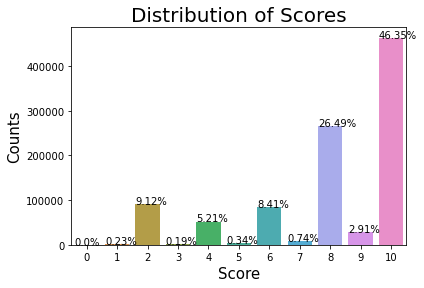

In [48]:
g=sns.countplot(x=data_subset["score"],data=data_subset);
for p in g.patches:
    txt=str(((p.get_height()/len(data_subset["score"]))*100).round(2)) + '%'
    txt_x=p.get_x()
    txt_y=p.get_height()
    g.text(txt_x,txt_y,txt)

plt.tight_layout 
plt.title("Distribution of Scores",fontsize=20);
plt.xlabel("Score",fontsize=15);
plt.ylabel("Counts",fontsize=15);


In [49]:
# Fetching top ten Most Rated Feature
pd.DataFrame({"No of times Rated":data_subset["product"].value_counts()},index=data_subset["product"].value_counts().index).head(10)

,No of times Rated
"Lenovo Vibe K4 Note (White,16GB)",3700
"Lenovo Vibe K4 Note (Black, 16GB)",3093
"OnePlus 3 (Graphite, 64 GB)",2889
"OnePlus 3 (Soft Gold, 64 GB)",2522
Huawei P8lite zwart / 16 GB,1895
Samsung Galaxy Express I8730,1889
"Lenovo Vibe K5 (Gold, VoLTE update)",1801
Samsung Galaxy S6 zwart / 32 GB,1669
Nokia 5800 XpressMusic,1518
"Lenovo Vibe K5 (Grey, VoLTE update)",1502


In [50]:
# users with most number of reviews.
pd.DataFrame({"No of times Reviewed":data_subset["author"].value_counts()},index=data_subset["author"].value_counts().index).head(10)

,No of times Reviewed
Amazon Customer,54600
Unknown,43899
Cliente Amazon,13634
e-bit,5948
Client d'Amazon,5500
Amazon Kunde,3307
Anonymous,1946
einer Kundin,1885
einem Kunden,1379
unknown,1212


In [51]:
# creating a mask dataset with products having more than 50 ratings 
mask_df1=pd.DataFrame({"product":data_subset["product"].value_counts().index,"criteria":list(data_subset["product"].value_counts()>50)})
mask_df1=mask_df1[mask_df1["criteria"]==True]
mask_df1

,product,criteria
0,"Lenovo Vibe K4 Note (White,16GB)",True
1,"Lenovo Vibe K4 Note (Black, 16GB)",True
2,"OnePlus 3 (Graphite, 64 GB)",True
3,"OnePlus 3 (Soft Gold, 64 GB)",True
4,Huawei P8lite zwart / 16 GB,True
...,...,...
4256,Micromax Canvas Doodle 2 A240 (Blue),True
4257,Samsung GT-I7500,True
4258,Samsung S3650,True
4259,ASUS Zenfone 4 (A400CG),True


In [52]:
#Selecting the data with products having more than 50 ratings
product_data=data_subset[data_subset["product"].isin(mask_df1["product"])].reset_index(drop=True)
product_data

,score,extract,author,product
0,10,This phone has lasted the test of time and has...,gilay28,Nokia 6301
1,6,nokia 5030 me game kesa dalay,vinod kumar,Nokia 5030
2,8,The zmax is a fantastic phone! I'll tell you w...,Amazon Customer,ZTE Z Max 2 16GB Unlocked GSM 4G LTE Quad-Core...
3,8,"Gostei muito do produto. Fininho, lindo e bem ...",Rita Goes,Samsung Smartphone Samsung Galaxy S III Neo Du...
4,10,I bought the LG optimus Exceed 2 to run perk T...,Lindsay Wong,LG Optimus Exceed 2 (Verizon Prepaid) (Discont...
...,...,...,...,...
556828,10,Great product indeed.,rupak,"OnePlus 3 (Graphite, 64 GB)"
556829,8,Like the phone but there is some problem with ...,shivangi,"OnePlus 3T (Soft Gold, 6GB RAM + 64GB memory)"
556830,2,War mit dem Handy im GroÃen und Ganzen sehr z...,Sandra,"Samsung Galaxy S5 mini Smartphone (4,5 Zoll (1..."
556831,10,Great. Fast and responsive. Able to run apps w...,Arj,DOOGEE X5 Max Pro 5.0'' IPS 4G Smartphone Andr...


In [53]:
# creating a mask dataset with authors having more than 50 reviews
mask_df2=pd.DataFrame({"author":data_subset["author"].value_counts().index,"criteria":list(data_subset["author"].value_counts()>50)})
mask_df2=mask_df2[mask_df2["criteria"]==True]
mask_df2

,author,criteria
0,Amazon Customer,True
1,Unknown,True
2,Cliente Amazon,True
3,e-bit,True
4,Client d'Amazon,True
...,...,...
643,sumeyyehavvaay,True
644,Rose,True
645,JÃ¼rgen,True
646,Johnny,True


In [54]:
#Selecting the data with authors having more than 50 reviews
author_data=data_subset[data_subset["author"].isin(mask_df2["author"])]
author_data

,score,extract,author,product
61365,10,"Beh, dopo Iphone e Lumia sono passato al mondo...",Giorgio,"Huawei P9 Plus Smartphone, LTE, Display 5.5'' ..."
114568,8,The zmax is a fantastic phone! I'll tell you w...,Amazon Customer,ZTE Z Max 2 16GB Unlocked GSM 4G LTE Quad-Core...
368948,6,Camera is good Quality,Amazon Customer,"Samsung Galaxy Grand Prime SM-G530H (White, 8GB)"
91785,6,warranty is hard to collect on. They count on ...,Amazon Customer,BLU NEO 4.5 Unlocked (White Black)
311114,8,bu Ã¼rÃ¼n iÃ§in bence bir ekran silici yapÄ±n,Unknown,Samsung Galaxy S3 I9300 16 GB Beyaz Cep Telefonu
...,...,...,...,...
331699,10,Ð¼Ð¾Ð´ÐµÐ»ÑÐºÐ° ÑÐµÐ»ÐµÑÐ¾Ð½Ð° Ð¼Ð½Ðµ Ð½ÑÐ...,Unknown,Sony Ericsson W880i
338246,6,"Well, it is nice one and easy to use. The func...",Amazon Customer,Vodafone Smart First 6 Pay As You Go Handset S...
67474,8,"had this phone about 2 yrs now, still going st...",Steve,HTC Wildfire S Sim Free Mobile Phone - Silver/...
58733,8,NaN,Unknown,Lenovo A2010


In [55]:
#Select the data with products having more than 50 ratings and users who have given more than 50 ratings. Report the shape of the final
#dataset
data_subset[data_subset["product"].isin(mask_df1["product"]) & data_subset["author"].isin(mask_df2["author"])]

,score,extract,author,product
114568,8,The zmax is a fantastic phone! I'll tell you w...,Amazon Customer,ZTE Z Max 2 16GB Unlocked GSM 4G LTE Quad-Core...
25345,8,Me ha parecido un mÃ³vil bastante aceptable pa...,juan,Lenovo Motorola Moto E - Smartphone libre Andr...
26725,10,ÐÑÐµÑÐ° ÑÐ°ÑÑÑÐ°Ð»Ð°ÑÑ ÑÐ¾ ÑÐ²Ð¾Ð¸Ð...,Unknown,Nokia 6131
129841,10,ÐÑ Ð½ÐµÐ¼Ð½Ð¾Ð¶ÐºÐ¾. ÐÑÐµÐ¼Ñ Ð¿ÑÐ°Ð¹Ð´Ðµ...,Unknown,HTC Desire 610
350506,8,Ich hatte bisher das S4 und war sehr zufrieden...,Amazon-Kunde,"Samsung Galaxy S5 Smartphone (5,1 Zoll (12,9 c..."
...,...,...,...,...
237171,10,Excellent product.,Amazon Customer,Asus Zenfone 2 Laser 5.5 ZE550KL-1B122IN (White)
331699,10,Ð¼Ð¾Ð´ÐµÐ»ÑÐºÐ° ÑÐµÐ»ÐµÑÐ¾Ð½Ð° Ð¼Ð½Ðµ Ð½ÑÐ...,Unknown,Sony Ericsson W880i
338246,6,"Well, it is nice one and easy to use. The func...",Amazon Customer,Vodafone Smart First 6 Pay As You Go Handset S...
67474,8,"had this phone about 2 yrs now, still going st...",Steve,HTC Wildfire S Sim Free Mobile Phone - Silver/...


# Popularity Based Recommendation System

In [56]:
product_recommender=pd.DataFrame(data_subset.groupby("product")["score"].agg("mean"))
product_recommender["Total_rating_count"]=data_subset.groupby("product")["score"].count()

In [57]:
# Recommending top ten products
product_recommender.sort_values(by=["score","Total_rating_count"],ascending=False).head(10)

,score,Total_rating_count
product,,
Motorola Smartphone Motorola Moto X Desbloqueado Preto Android 4.2.2 CÃ¢mera 10MP e Frontal 2MP MemÃ³ria Interna de 16GB GSM,10.0,141
Motorola Smartphone Motorola Moto G Dual Chip Desbloqueado TIM Android 4.3 Tela 4.5 8GB 3G Wi-Fi CÃ¢mera 5MP - Preto,10.0,128
Samsung Galaxy Note5,10.0,127
Samsung Smartphone Dual Chip Samsung Galaxy SIII Duos Desbloqueado Claro Azul Android 4.1 3G/Wi-Fi CÃ¢mera 5MP,10.0,121
Nokia Smartphone Nokia Lumia 520 Desbloqueado Oi Preto Windows Phone 8 CÃ¢mera 5MP 3G Wi-Fi MemÃ³ria Interna 8G GPS,10.0,119
Samsung Smartphone Galaxy Win Duos Branco Desbloqueado Dual Chip CÃ¢mera 5MP Processador Quad Core 1.2 Ghz Android 4.1 3G Wi- Fi e MemÃ³ria 8GB,10.0,118
Samsung Smartphone Dual Chip Samsung Galaxy SIII Duos Desbloqueado Claro Azul Android 4.1 3G/Wi-Fi C??mera 5MP,10.0,112
Motorola Smartphone Motorola Novo Moto G DTV Colors Dual Chip XT 1069 Desbloqueado Android 4.4 Tela 5 16GB 3G Wi-Fi CÃ¢mera de 8MP - Preto,10.0,104
Apple iPhone 4S Branco 8GB - Apple,10.0,101


# Build a collaborative filtering model using SVD.
- To build a recommender System using SVD we just need users ,items and ratings. Thus we can safely drop rest of the columns
- Here we will use surprise.reader.Reader class to parse a file containing ratings
- Such a file is assumed to specify only one rating per line, and each line needs to respect the following structure:
    - user ; item ; rating ; [timestamp]

In [58]:
from surprise import Reader
from surprise import Dataset

In [123]:
data_subset[["author","product","score"]].sample(n=5000,random_state=612).reset_index(drop=True)

,author,product,score
0,Tenoyoki,Sony Ericsson W610i,10
1,guymontanari,Samsung G935 Galaxy S7 Edge Smartphone da 32GB...,6
2,Daniel Romney,BLU Vivo Air LTE Smartphone - GSM Unlocked - B...,4
3,Jeffery S.,"Motorola Nexus 6 Unlocked Smartphone, 32 GB, U...",10
4,viva7874,"Annayak?? ""Natsumi"", Eau de Toilette",10
...,...,...,...
4995,osmntyr,Samsung S5233W STAR Wi - Fi CEP TELEFONU,8
4996,mrsebas93,Samsung Focus,7
4997,Cliente Amazon,"Oukitel U7 Plus - 5,5 pollici HD Android 6.0 4...",10
4998,antonferdinand,HTC One X 32Gb,10


In [124]:
reader=Reader(rating_scale=(1,10))
new_dataset=Dataset.load_from_df(data_subset[["author","product","score"]].sample(n=5000,random_state=612).reset_index(drop=True),reader)

In [125]:
new_dataset

In [126]:
trainset= new_dataset.build_full_trainset()

In [127]:
type(trainset)

surprise.trainset.Trainset

In [128]:
#Using the SVD algorithm.
algo = SVD()

#Train the algorithm on the trainset
model= algo.fit(trainset)

In [129]:
#predict the rating of all (u,i) pair that are not in the training set
testset=trainset.build_anti_testset(fill=None)
predictions=algo.test(testset)

In [130]:
predictions

[Prediction(uid='Tenoyoki', iid='Samsung G935 Galaxy S7 Edge Smartphone da 32GB, Argento [Italia]', r_ui=7.972, est=8.426366636006797, details={'was_impossible': False}),
 Prediction(uid='Tenoyoki', iid='BLU Vivo Air LTE Smartphone - GSM Unlocked - Black', r_ui=7.972, est=7.857020241149166, details={'was_impossible': False}),
 Prediction(uid='Tenoyoki', iid='Motorola Nexus 6 Unlocked Smartphone, 32 GB, U. S. Warranty - Midnight Blue', r_ui=7.972, est=8.607913968703878, details={'was_impossible': False}),
 Prediction(uid='Tenoyoki', iid='Annayak?? "Natsumi", Eau de Toilette', r_ui=7.972, est=8.192102941874305, details={'was_impossible': False}),
 Prediction(uid='Tenoyoki', iid='Motorola Smartphone Motorola Moto G (2Âª GeraÃ§Ã£o) Dual Chip Desbloqueado...', r_ui=7.972, est=8.315104408053484, details={'was_impossible': False}),
 Prediction(uid='Tenoyoki', iid='HTC Windows Phone 8X - Smartphone libre (pantalla t??ctil de 4,3" 720 x 1280, c??mara 8 Mp, 16 GB de capacidad, 2 procesadores de 

## Tune algorithm parameters with GridSearchCV

In [142]:
param_grid = {'n_factors':[20,50,100,150],'n_epochs': [5, 10,20,50], 'lr_all': [0.001,0.002, 0.005],
              'reg_all': [0.1,0.4, 0.6]}
gs = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=3)

gs.fit(new_dataset)

# best RMSE score
print(gs.best_score['rmse'])

# combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

2.5541294978236597
{'n_factors': 20, 'n_epochs': 50, 'lr_all': 0.002, 'reg_all': 0.6}


the best_estimator attribute gives us an algorithm instance with the optimal set of parameters, which can be used how we please

In [210]:
# We can now use the algorithm that yields the best rmse:
algo = gs.best_estimator['rmse']
algo.fit(trainset)

In [211]:
#predict the rating of all (u,i) pair that are not in the training set
predictions=algo.test(testset)

### Getting top 5 predicted items and their ratings for test users.

In [212]:
def get_top_n(predictions, n=5):
    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        # here i have created a dictionary and made user id as keys and item id and estimated rating(as tuple) as values
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]# assiging every key(which is a user) just n item and rating pair

    return top_n

In [213]:
top_n =get_top_n(predictions, n=5)

In [214]:
pred= pd.DataFrame()
for uid , user_ratings in top_n.items():# here columns names are the users and row values represent items for their recommendation
    val=[]
    for iid,est in user_ratings:
        val.append(iid)
    pred[uid]=val
  
    

In [151]:
# pred represent the dataframe containing the recommended items to every user in test 
pred

,Tenoyoki,guymontanari,Daniel Romney,Jeffery S.,viva7874,Guilherme Marques Moraes,Alberto L??pez,davincianguy,Fran,ÐÐµÐ½Ñ,...,mernyi-loskut,Anonym,Kevin Henry,Tanya,sandro,Lionel ClÃ©ment,Palangala S. Ravindra,osmntyr,mrsebas93,antonferdinand
0,"Lenovo Motorola Moto G Smartphone, 4,5 pollici...","OnePlus 3 (Graphite, 64 GB)","OnePlus 3 (Graphite, 64 GB)","OnePlus 3 (Graphite, 64 GB)","OnePlus 3 (Graphite, 64 GB)","OnePlus 3 (Graphite, 64 GB)","OnePlus 3 (Graphite, 64 GB)","OnePlus 3 (Graphite, 64 GB)","OnePlus 3 (Graphite, 64 GB)","OnePlus 3 (Graphite, 64 GB)",...,"OnePlus 3 (Graphite, 64 GB)","OnePlus 3 (Graphite, 64 GB)","OnePlus 3 (Graphite, 64 GB)","OnePlus 3 (Soft Gold, 64 GB)","OnePlus 3 (Graphite, 64 GB)","Lenovo Motorola Moto G Smartphone, 4,5 pollici...","OnePlus 3 (Graphite, 64 GB)","OnePlus 3 (Graphite, 64 GB)","Lenovo Motorola Moto G Smartphone, 4,5 pollici...","OnePlus 3 (Graphite, 64 GB)"
1,"OnePlus 3 (Graphite, 64 GB)","Lenovo Motorola Moto G Smartphone, 4,5 pollici...","Lenovo Motorola Moto G Smartphone, 4,5 pollici...","Lenovo Motorola Moto G Smartphone, 4,5 pollici...","OnePlus 3 (Soft Gold, 64 GB)","OnePlus 3 (Soft Gold, 64 GB)","Lenovo Motorola Moto G Smartphone, 4,5 pollici...","OnePlus 3 (Soft Gold, 64 GB)","OnePlus 3 (Soft Gold, 64 GB)","OnePlus 3 (Soft Gold, 64 GB)",...,"Lenovo Motorola Moto G Smartphone, 4,5 pollici...","OnePlus 3 (Soft Gold, 64 GB)","Lenovo Motorola Moto G Smartphone, 4,5 pollici...","OnePlus 3 (Graphite, 64 GB)","OnePlus 3 (Soft Gold, 64 GB)","OnePlus 3 (Soft Gold, 64 GB)","OnePlus 3 (Soft Gold, 64 GB)","Lenovo Motorola Moto G Smartphone, 4,5 pollici...","OnePlus 3 (Graphite, 64 GB)","Lenovo Motorola Moto G Smartphone, 4,5 pollici..."
2,"OnePlus 3 (Soft Gold, 64 GB)","OnePlus 3 (Soft Gold, 64 GB)","OnePlus 3 (Soft Gold, 64 GB)","OnePlus 3 (Soft Gold, 64 GB)","Lenovo Motorola Moto G Smartphone, 4,5 pollici...","Lenovo Motorola Moto G Smartphone, 4,5 pollici...","OnePlus 3 (Soft Gold, 64 GB)","Lenovo Motorola Moto G Smartphone, 4,5 pollici...","Lenovo Motorola Moto G Smartphone, 4,5 pollici...","Lenovo Motorola Moto G Smartphone, 4,5 pollici...",...,"OnePlus 3 (Soft Gold, 64 GB)","Lenovo Motorola Moto G Smartphone, 4,5 pollici...",Samsung Galaxy S7 32GB (T-Mobile),"Lenovo Motorola Moto G Smartphone, 4,5 pollici...","Lenovo Motorola Moto G Smartphone, 4,5 pollici...","OnePlus 3 (Graphite, 64 GB)","Lenovo Motorola Moto G Smartphone, 4,5 pollici...",Samsung Galaxy S7 32GB (T-Mobile),"OnePlus 3 (Soft Gold, 64 GB)","OnePlus 3 (Soft Gold, 64 GB)"
3,Samsung Galaxy S7 32GB (T-Mobile),Samsung Galaxy S7 32GB (T-Mobile),Samsung Galaxy S7 32GB (T-Mobile),Samsung Galaxy S7 32GB (T-Mobile),Samsung Galaxy S7 32GB (T-Mobile),Samsung Galaxy S7 32GB (T-Mobile),Samsung Galaxy S7 32GB (T-Mobile),Samsung Galaxy S7 32GB (T-Mobile),Samsung Galaxy S7 32GB (T-Mobile),Samsung Galaxy S7 32GB (T-Mobile),...,Samsung Galaxy S7 32GB (T-Mobile),Samsung Galaxy S7 32GB (T-Mobile),Nokia 6300,Samsung Galaxy S7 32GB (T-Mobile),Samsung Galaxy S7 32GB (T-Mobile),"Huawei Honor 5X Unlocked Smartphone, 16GB Dark...",Samsung Galaxy S7 32GB (T-Mobile),"OnePlus 3 (Soft Gold, 64 GB)",Samsung Galaxy S7 32GB (T-Mobile),Samsung Galaxy S7 32GB (T-Mobile)
4,"Huawei Honor 5X Unlocked Smartphone, 16GB Dark...",Nokia 6300,Nokia 6300,"Motorola Moto G 3rd Generation (Black, 8GB)","Motorola Moto G 3rd Generation (Black, 8GB)","Motorola Moto G 3rd Generation (Black, 8GB)","Motorola Moto G 3rd Generation (Black, 8GB)","Motorola Moto G 3rd Generation (Black, 8GB)",Nokia 6300,"Motorola Moto G 3rd Generation (Black, 8GB)",...,Nokia 6300,Nokia 6300,"Motorola Moto G 3rd Generation (Black, 8GB)","Huawei Honor 5X Unlocked Smartphone, 16GB Dark...","Motorola Moto G 3rd Generation (Black, 8GB)",Samsung Galaxy S7 32GB (T-Mobile),"Motorola Moto G 3rd Generation (Black, 8GB)",Nokia 6300,"Motorola Moto G 3rd Generation (Black, 8GB)",Nokia 6300


In [136]:
from surprise.model_selection import cross_validate
cross_validate(algo, new_dataset, measures=['RMSE'], cv=5, verbose=True)

Evaluating RMSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    2.5276  2.5765  2.5683  2.6158  2.5878  2.5752  0.0287  
Fit time          0.34    0.29    0.29    0.31    0.31    0.31    0.02    
Test time         0.00    0.01    0.01    0.00    0.00    0.01    0.01    


{'test_rmse': array([2.52763719, 2.57648492, 2.56828765, 2.61578365, 2.58783528]),
 'fit_time': (0.34299373626708984,
  0.29376673698425293,
  0.29344701766967773,
  0.3127896785736084,
  0.3127610683441162),
 'test_time': (0.0010311603546142578,
  0.010062694549560547,
  0.012660741806030273,
  0.0,
  0.0020580291748046875)}

## Building Collaborative Filtering Model using KNNWithMeans.
### User Based Model

In [152]:
from surprise.model_selection import train_test_split
train_set,test_set= train_test_split(new_dataset,random_state=612)

In [155]:
# Use user_based true/false to switch between user-based or item-based collaborative filtering
algo_user = KNNWithMeans(k=50, sim_options={'name': 'pearson_baseline', 'user_based': False})
algo_user.fit(train_set)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [156]:
# run the  model against the testset
test_pred_U = algo_user.test(test_set)

In [157]:
# get RMSE
print("Item-based Model : Test Set")
accuracy.rmse(test_pred_U, verbose=True)

Item-based Model : Test Set
RMSE: 2.5385


2.538462612036808

## Tune algorithm parameters with GridSearchCV

In [158]:
sim_options = {
    "name": ["msd", "cosine","pearson_baseline"],
    "min_support": [3, 4, 5],
    "user_based": [False, True],
}
param_grid = {'k':[40,50,60],"sim_options": sim_options}
gs_user = GridSearchCV(KNNWithMeans, param_grid, measures=['rmse', 'mae'], cv=3)

gs_user.fit(new_dataset)

# best RMSE score
print(gs_user.best_score['rmse'])

# combination of parameters that gave the best RMSE score
print(gs_user.best_params['rmse'])

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computi

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline si

In [159]:
# We can now use the algorithm that yields the best rmse:
algo = gs_user.best_estimator['rmse']
algo.fit(train_set)

Computing the cosine similarity matrix...
Done computing similarity matrix.


In [160]:
# run the  model against the testset
test_pred_U_tuned = algo_user.test(test_set)

In [180]:
test_pred_U_tuned

[Prediction(uid='Pier Paolo', iid='Huawei P8 Lite Smartphone, Display 5" IPS, Processore Octa-Core 1.5 GHz, Memoria Interna da 16 GB, 2 GB RAM, Fotocamera 13 MP, monoSIM, Android 5.0, Bianco [Italia]', r_ui=10.0, est=7.94575, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='benedicte Brochard', iid='Cophone Film de protection Ecran Cophone pour Samsung Galaxy A3 2016 SM-A310F en Verre TrempÃ© Premium Anti Chocs et Casse, Anti empreintes digitales et gras, bords arrondis,duretÃ© max 9H, haute dÃ©finition Glass Screen Protector Vitre Tempered 2,5D', r_ui=6.0, est=7.94575, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='smdarling', iid='HTC AT&T Quickfire GTX75 Cell Phone Orange', r_ui=8.0, est=7.94575, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='nicole truckenmueller', iid='Samsung Wave M S7250 Smartphone (9,3 cm (3,65 Zoll) Display, Touchscreen, 5 

### Test Predictions for User Model

In [182]:
pred_df=pd.DataFrame(test_pred_U_tuned)

In [183]:
pred_df.head()

,uid,iid,r_ui,est,details
0,Pier Paolo,"Huawei P8 Lite Smartphone, Display 5"" IPS, Pro...",10.0,7.945750,"{'was_impossible': True, 'reason': 'User and/o..."
1,benedicte Brochard,Cophone Film de protection Ecran Cophone pour ...,6.0,7.945750,"{'was_impossible': True, 'reason': 'User and/o..."
2,smdarling,HTC AT&T Quickfire GTX75 Cell Phone Orange,8.0,7.945750,"{'was_impossible': True, 'reason': 'User and/o..."
3,nicole truckenmueller,"Samsung Wave M S7250 Smartphone (9,3 cm (3,65 ...",4.0,7.945750,"{'was_impossible': True, 'reason': 'User and/o..."
4,Amazon Kunde,Microsoft Nokia Lumia 630 Single-SIM Smartphon...,10.0,7.333333,"{'actual_k': 0, 'was_impossible': False}"


### Top 5 Product Recommendations for Amazon Customers.

In [184]:
pred_df[pred_df['uid']=='Amazon Customer'][['iid','est']].sort_values(by='est',ascending=False).head(5)

,iid,est
294,Motorola Moto G 16GB SIM-Free Smartphone - Bla...,10.000000
260,"OnePlus 3 (Graphite, 64 GB)",9.767193
479,"OnePlus 3 (Graphite, 64 GB)",9.767193
744,OnePlus X (Limited Edition Ceramic),9.205600
899,OnePlus X (Limited Edition Ceramic),9.205600


### Steps in User based Collaborative filtering model.

1) Finding neighbours for the particular user based on the similarity measure.**


2) 50 neighbours are selected in this project.**


3) Filter out the movies which are already watched by the user**


4) For remaining movies find out the mean rating and sort the movies in descending order and recommend to the user.**


5) So user may get recommendation for the movie which are highly rated by the user like him.**


6) Also average rating for the movie which is not watched by user can be estimated by its neighbours.**

## Item Based Model

In [185]:
algo_item = KNNWithMeans(k=50, sim_options={'name': 'pearson_baseline', 'user_based': False})
algo_item.fit(train_set)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [186]:
# run the trained model against the testset
test_pred_item = algo_item.test(testset)

In [187]:
# get RMSE
print("Item-based Model : Test Set")
accuracy.rmse(test_pred_item, verbose=True)

Item-based Model : Test Set
RMSE: 2.0649


2.0648531364823284

## Tune Hyper parameters using GridSearchCV

In [194]:
sim_options = {
    "name": ["msd", "cosine","pearson_baseline"],
    "min_support": [3, 4, 5],
    "user_based": [False]
}
param_grid = {'k':[30,40,50,60],"sim_options": sim_options}
gs_item = GridSearchCV(KNNWithMeans, param_grid, measures=['rmse', 'mae'], cv=3)

gs_item.fit(new_dataset)

# best RMSE score
print(gs_item.best_score['rmse'])

# combination of parameters that gave the best RMSE score
print(gs_item.best_params['rmse'])

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix.

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similari

In [195]:
# We can now use the algorithm that yields the best rmse:
algo = gs_item.best_estimator['rmse']
algo.fit(train_set)

Computing the cosine similarity matrix...
Done computing similarity matrix.


In [202]:
# run the trained model against the testset
test_pred_item_tuned = algo_item.test(test_set)

In [203]:
pred_df_item=pd.DataFrame(test_pred_item_tuned)

In [204]:
pred_df_item.head()

,uid,iid,r_ui,est,details
0,Pier Paolo,"Huawei P8 Lite Smartphone, Display 5"" IPS, Pro...",10.0,7.945750,"{'was_impossible': True, 'reason': 'User and/o..."
1,benedicte Brochard,Cophone Film de protection Ecran Cophone pour ...,6.0,7.945750,"{'was_impossible': True, 'reason': 'User and/o..."
2,smdarling,HTC AT&T Quickfire GTX75 Cell Phone Orange,8.0,7.945750,"{'was_impossible': True, 'reason': 'User and/o..."
3,nicole truckenmueller,"Samsung Wave M S7250 Smartphone (9,3 cm (3,65 ...",4.0,7.945750,"{'was_impossible': True, 'reason': 'User and/o..."
4,Amazon Kunde,Microsoft Nokia Lumia 630 Single-SIM Smartphon...,10.0,7.333333,"{'actual_k': 0, 'was_impossible': False}"


### Top 5 Product Recommendations for Amazon Customers

In [205]:
pred_df_item[pred_df_item['uid']=='Amazon Customer'][['iid','est']].sort_values(by='est',ascending=False).head(5)

,iid,est
294,Motorola Moto G 16GB SIM-Free Smartphone - Bla...,10.000000
260,"OnePlus 3 (Graphite, 64 GB)",9.767193
479,"OnePlus 3 (Graphite, 64 GB)",9.767193
744,OnePlus X (Limited Edition Ceramic),9.205600
899,OnePlus X (Limited Edition Ceramic),9.205600


### user based model is performing slightly better than item based model

In [216]:
models=[gs.best_estimator['rmse'],gs_item.best_estimator['rmse'],gs_user.best_estimator['rmse']]
for model in models:
    cross_validate(model, new_dataset, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    2.5058  2.5440  2.4621  2.6404  2.6357  2.5576  0.0707  
MAE (testset)     1.9494  1.9532  1.8987  2.0346  2.0076  1.9687  0.0477  
Fit time          0.55    0.32    0.28    0.28    0.27    0.34    0.11    
Test time         0.31    0.01    0.01    0.01    0.01    0.07    0.12    


{'test_rmse': array([2.50579627, 2.54397792, 2.46209151, 2.6404355 , 2.63573508]),
 'test_mae': array([1.9494088 , 1.95319423, 1.89870909, 2.03464498, 2.00761614]),
 'fit_time': (0.5477786064147949,
  0.3217332363128662,
  0.2813456058502197,
  0.2759890556335449,
  0.26793336868286133),
 'test_time': (0.3051719665527344,
  0.0076198577880859375,
  0.009048938751220703,
  0.010129928588867188,
  0.008001327514648438)}

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNWithMeans on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    2.6061  2.4975  2.7190  2.5685  2.7072  2.6196  0.0840  
MAE (testset)     1.9500  1.8990  2.0463  1.9144  2.0679  1.9755  0.0690  
Fit time          0.84    0.30    0.30    0.30    0.32    0.41    0.21    
Test time         0.04    0.02    0.03    0.02    0.03    0.03    0.01    


{'test_rmse': array([2.60609173, 2.49746993, 2.71896075, 2.56851309, 2.70719756]),
 'test_mae': array([1.94999799, 1.89903113, 2.04630786, 1.9144041 , 2.06791593]),
 'fit_time': (0.8397400379180908,
  0.2986137866973877,
  0.2996022701263428,
  0.3042151927947998,
  0.31845760345458984),
 'test_time': (0.03502249717712402,
  0.01600813865661621,
  0.025688886642456055,
  0.02296304702758789,
  0.025466203689575195)}

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNWithMeans on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    2.5320  2.6434  2.5539  2.6339  2.6434  2.6013  0.0483  
MAE (testset)     1.9544  1.9916  1.9356  1.9870  2.0184  1.9774  0.0292  
Fit time          0.78    0.32    0.37    0.30    0.30    0.41    0.19    
Test time         0.02    0.01    0.00    0.01    0.00    0.01    0.01    


{'test_rmse': array([2.53197953, 2.64339299, 2.55391448, 2.63388005, 2.64335651]),
 'test_mae': array([1.95437526, 1.99159909, 1.93563722, 1.98703874, 2.01842902]),
 'fit_time': (0.7812273502349854,
  0.3183708190917969,
  0.36570239067077637,
  0.2987229824066162,
  0.302138090133667),
 'test_time': (0.01589679718017578,
  0.014352083206176758,
  0.0009970664978027344,
  0.014853715896606445,
  0.0030465126037597656)}

#### among SVD, user based and Item based , SVD is performing best amongst three

## In what business scenario you should use popularity based Recommendation Systems?

> When we have new user who doesn't watch any of the movies we cant able to find its neighbours . In this case popularity based recommendation is used.As the name suggests Popularity based recommendation system works with the trend. It basically uses the items which are in trend right now. For example, if any product which is usually bought by every new user then there are chances that it may suggest that item to the user who just signed up.

## In what business scenario you should use CF based Recommendation Systems ?

> When user is not new user and he also got some neighbours. The idea behind collaborative filtering is to consider users’ opinions on different products and recommend the best product to each user based on the user’s previous rankings and the opinion of other similar types of users.It ha two types user-based and item-based.

Steps in user Based colloborative filtering

> 1) Finding neighbours for the particular user based on the similarity measure.**

> 2) 50 neighbours are selected in this project.**

> 3) Filter out the movies which are already watched by the user**

> 4) For remaining movies find out the mean rating and sort the movies in descending order and recommend to the user.**

> 5) So user may get recommendation for the movie which are highly rated by the user like him.**

> 6) Also average rating for the movie which is not watched by user can be estimated by its neighbours.**

**For item based every steps are based on items.**

## What other possible methods can you think of which can further improve the recommendation for different users ?

> In some cases we may face cold stard or gray shep problem.In such cases, Combining any two filtering methods may help in improving the recommendation filter. These are known as Hybrid filtering.

> IN Hybrid filtering, which combines two or more filtering techniques in different ways in order to increase the accuracy and performance of recommender systems has been proposed. These techniques combine two or more filtering approaches in order to harness their strengths while leveling out their corresponding weaknesses.

> When new users signs in, we may recommend using popularity based filtering and once users starts watching the movies then it can be switched to user based or item based . This can improve the recommendation.